In [31]:
!pip install pandas numpy matplotlib seaborn openpyxl


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')


In [33]:
# Load the Excel file (make sure the file is in the same folder)
df = pd.read_excel("D:\datasets\online+retail\Online Retail.xlsx")

# Show the first few rows
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [34]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [35]:
#removed the null values 
df = df.dropna(subset=['CustomerID'])
 #removed the canceled transactions
df['InvoiceNo'].astype(str).str.startswith('C')
# Removed rows with negative or zero quantity or unit price
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
 #Created a new column: TotalPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

 # Convert InvoiceDate to datetime (if not already)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

 # Final check
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
 8   TotalPrice   397884 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [36]:
print("Total unique customers:", df['CustomerID'].nunique())
print("Total transactions:", len(df))
print("Date range:", df['InvoiceDate'].min(), "to", df['InvoiceDate'].max())


Total unique customers: 4338
Total transactions: 397884
Date range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00


In [37]:
#RFM Segmentation 
# Convert 'InvoiceDate' to datetime if not already
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Set reference date (next day after last purchase)
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
print("Reference date:", reference_date)


Reference date: 2011-12-10 12:50:00


In [38]:
#Group by CustomerID and compute RFM values
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,   # Recency
    'InvoiceNo': 'nunique',                                     # Frequency
    'TotalPrice': 'sum'                                         # Monetary
}).reset_index()


In [39]:
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


In [40]:
rfm.describe()


,CustomerID,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000,4338.000000
mean,15300.408022,92.536422,4.272015,2054.266460
std,1721.808492,100.014169,7.697998,8989.230441
min,12346.000000,1.000000,1.000000,3.750000
25%,13813.250000,18.000000,1.000000,307.415000
50%,15299.500000,51.000000,2.000000,674.485000
75%,16778.750000,142.000000,5.000000,1661.740000
max,18287.000000,374.000000,209.000000,280206.020000


In [41]:
# RFM score 
# Recency Score: lower is better (recent purchase), so high score for low recency
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])

# Frequency Score: higher is better, so high score for high frequency
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])

# Monetary Score: higher is better
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])


In [42]:
# final rfm score in 3 digit like 123
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)


In [43]:
# customer segmentation using rfm scores 
def rfm_segment(score):
    if score == '444':
        return 'Champions'
    elif score[0] == '4':
        return 'Potential Loyalist'
    elif score[2] == '4':
        return 'Big Spender'
    else:
        return 'Other'


In [44]:
#To assign clear, readable categories to each customer
rfm['Segment'] = rfm['RFM_Score'].apply(rfm_segment)


In [45]:
print(rfm.columns)


Index(['CustomerID', 'Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score',
       'M_Score', 'RFM_Score', 'Segment'],
      dtype='object')


In [46]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,12346.0,326,1,77183.60,1,1,4,114,Big Spender
1,12347.0,2,7,4310.00,4,4,4,444,Champions
2,12348.0,75,4,1797.24,2,3,4,234,Big Spender
3,12349.0,19,1,1757.55,3,1,4,314,Big Spender
4,12350.0,310,1,334.40,1,1,2,112,Other


In [47]:
from sklearn.preprocessing import StandardScaler

rfm_clustering = rfm[['Recency', 'Frequency', 'Monetary']]
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_clustering)


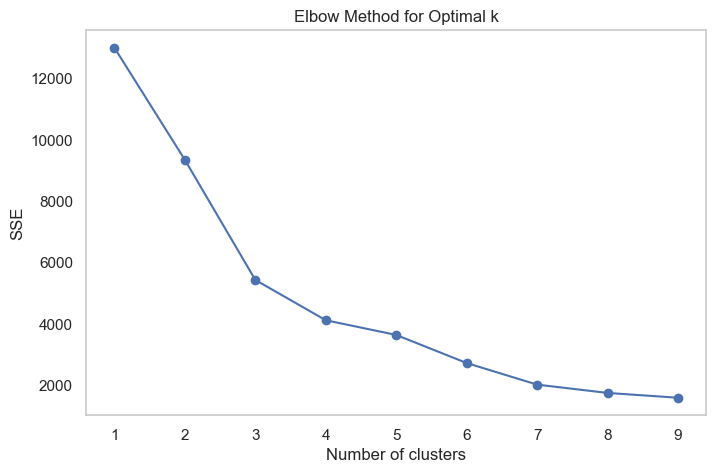

In [48]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(rfm_scaled)
    sse[k] = kmeans.inertia_

# Plot the elbow
plt.figure(figsize=(8, 5))
plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.title("Elbow Method for Optimal k")
plt.grid()
plt.show()


In [49]:
kmeans = KMeans(n_clusters=4, random_state=1)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)


In [50]:
# Group by cluster and calculate mean for only numeric columns
rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().sort_values(by='Monetary', ascending=False)



,Recency,Frequency,Monetary
Cluster,,,
3,6.714286,65.428571,184143.690000
2,13.406250,34.739583,21702.508229
0,42.412472,4.136752,1563.782438
1,247.312268,1.552974,556.665949


<Axes: xlabel='Recency', ylabel='Monetary'>

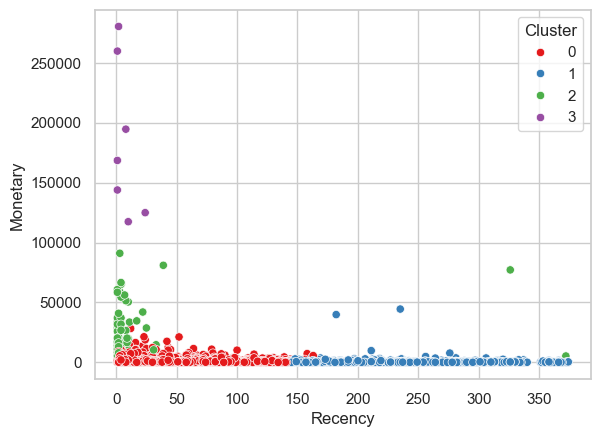

In [51]:
import seaborn as sns

sns.scatterplot(x='Recency', y='Monetary', hue='Cluster', data=rfm, palette='Set1')


In [52]:
#Customer Lifetime Value (CLTV or LTV)
# Average Order Value (AOV)
aov = df.groupby('InvoiceNo')['TotalPrice'].sum().mean()

# Purchase Frequency = total orders / total customers
total_orders = df['InvoiceNo'].nunique()
total_customers = df['CustomerID'].nunique()
purchase_frequency = total_orders / total_customers

print(f"AOV: {aov:.2f}")
print(f"Purchase Frequency: {purchase_frequency:.2f}")


AOV: 480.87
Purchase Frequency: 4.27


In [53]:
repeat_customers = df.groupby('CustomerID')['InvoiceNo'].nunique()
repeat_rate = (repeat_customers > 1).sum() / total_customers
churn_rate = 1 - repeat_rate

print(f"Repeat Rate: {repeat_rate:.2f}")
print(f"Churn Rate: {churn_rate:.2f}")


Repeat Rate: 0.66
Churn Rate: 0.34


In [54]:
customer_lifespan = 1 / churn_rate
print(f"Customer Lifespan: {customer_lifespan:.2f} transactions")


Customer Lifespan: 2.91 transactions


In [55]:
ltv = aov * purchase_frequency * customer_lifespan
print(f"Estimated Lifetime Value (LTV): ₹{ltv:.2f}")


Estimated Lifetime Value (LTV): ₹5968.79


In [56]:
# Assign LTV to Each Customer
from sklearn.preprocessing import MinMaxScaler

# Select features
rfm_features = rfm[['Recency', 'Frequency', 'Monetary']]

# Apply Min-Max Scaling
scaler = MinMaxScaler()
rfm_scaled = scaler.fit_transform(rfm_features)

# Convert back to DataFrame
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['Recency_Scaled', 'Frequency_Scaled', 'Monetary_Scaled'])
rfm_scaled_df['CustomerID'] = rfm['CustomerID'].values


In [57]:
# Higher frequency + higher spending + lower recency = high LTV
rfm_scaled_df['LTV_Score'] = (
    (1 - rfm_scaled_df['Recency_Scaled']) * 0.15 + 
    rfm_scaled_df['Frequency_Scaled'] * 0.35 + 
    rfm_scaled_df['Monetary_Scaled'] * 0.50
)


In [58]:
# Merge back with original RFM and cluster info
rfm_final = pd.merge(rfm, rfm_scaled_df[['CustomerID', 'LTV_Score']], on='CustomerID')


In [59]:
# Sort customers by highest estimated LTV score
rfm_final.sort_values(by='LTV_Score', ascending=False).head(10)


,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment,Cluster,LTV_Score
1689,14646.0,2,73,280206.02,4,4,4,444,Champions,3,0.770752
1879,14911.0,1,201,143825.06,4,4,4,444,Champions,3,0.743177
4201,18102.0,1,60,259657.30,4,4,4,444,Champions,3,0.712611
3728,17450.0,8,46,194550.79,4,4,4,444,Champions,3,0.570061
326,12748.0,1,209,33719.73,4,4,4,444,Champions,2,0.560164
3008,16446.0,1,2,168472.50,4,2,4,424,Potential Loyalist,3,0.452303
1333,14156.0,10,55,117379.63,4,4,4,444,Champions,3,0.446695
4010,17841.0,2,124,40991.57,4,4,4,444,Champions,2,0.429709
562,13089.0,3,97,58825.83,4,4,4,444,Champions,2,0.415698
2176,15311.0,1,91,60767.90,4,4,4,444,Champions,2,0.409871


In [60]:
# Export the final customer LTV + RFM + Cluster data
rfm_final.to_csv("rfm_customer_ltv_data.csv", index=False)
